# JupyterNotebook meets <font color='orange'>5</font><font color='#1B9AC'>Team</font>Weekly

## Was ist Jupyter-Notebook?

## IPython

- entstanden 2001
- als interaktive Entwicklungsumgebung in Konkurenz zu den kommerziellen Lösungen wie Matlab und Co.
- es entstand im Rahmen der *SciPy*-Softwareumgebung
- Softwaretechnisch basiertend auf:
  - *tornado*-Webserver
  - *0MQ*-Messaging-Middleware 
  - Websockets
  - Speicherformat ist JSON und zwar je Dokument

## Jupyter-Notebook

- seit 2014 als *spin-off project* um
  - Abtrennung der sprachneutralen Teile in Jupyter (Notebook und Kommunikationskomponenten)
  - Auslagern des Kernels IPython
  - Ausdehnen auf Sprachen wie 
    - *R*, *Julia*, *Ruby* 
    - später auch auf *F#*, *C#*, *Scala*, JavaScript/TypeScript (und [DotNetCore](https://devblogs.microsoft.com/dotnet/net-core-with-juypter-notebooks-is-here-preview-1/))
    - und viele viele weitere

## Was heißt das Jetzt?

- leistungsstarken Kombination von
  - Code
  - Grafiken
  - beschreibendem Text 
- Anwendungsbereiche
  - Data Science-Anleitung
  - Datenbereinigung und -transformation
  - numerische Simulation
  - statistische Modellierung
  - Entwicklung von Machine Learning-Modellen.

# Beispiele

## Hello world mit *Code*

In [1]:
# Einfacher Code
import sys
print(sys.version)
print("hello world")

3.7.4 (default, Jul 28 2019, 15:46:27) 
[Clang 11.0.0 (clang-1100.0.20.17)]
hello world


## Hello world mit *Markdown*



Es werden auch *Zellen* für die Dokumentation mittels **Markdown** unterstützt.

- Spiegelstrich 11
- Spiegelstrich 2

1. Aufzählung 1
1. Aufzählung 2

## Hello world mit *Shell-Kommando*

In [2]:
!ls

JupyterNotebook-meets-5TeamWeekly.ipynb pivottablejs.html
README.md                               postBuild
_assets                                 requirements.txt
papermill_sample


## Hello world mit *Jupyter Macros*

In [3]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %env || %config || %history
%config

Available objects for config:
     AliasManager
     DisplayFormatter
     HistoryManager
     IPCompleter
     IPKernelApp
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     StoreMagics
     ZMQInteractiveShell


## REST-Services verwenden

In [4]:
import json
import requests

In [5]:
request_freedays = requests.get('https://feiertage-api.de/api/?jahr=2019')
str_data = request_freedays.content.decode("utf-8")
freedays = json.loads(str_data)

for index, key in enumerate(freedays['NW'].keys()):
    print("{} -> {}: {}".format(index, key, freedays['NW'][key]))
    if index == 3:
        break

0 -> Neujahrstag: {'datum': '2019-01-01', 'hinweis': ''}
1 -> Karfreitag: {'datum': '2019-04-19', 'hinweis': ''}
2 -> Ostermontag: {'datum': '2019-04-22', 'hinweis': ''}
3 -> Tag der Arbeit: {'datum': '2019-05-01', 'hinweis': ''}


## OAuth zum Zugriff auf externe Daten mit **ipyauth**

- OAuth ist heute typisch für den Zugriff auf APIs
- OAuth-*Token* im Notebook speichern >> Sicherheitsproblem

### ipyauth Demo

- **???**
- [OAuth2 from inside a Jupyter Notebook](https://medium.com/@olivier.borderies/oauth2-from-inside-a-jupyter-notebook-5f5e61ec5d38)

# Hilfreiche Bibliotheken

## pandas - Umgang mit Daten bzw. Listen

- Umgang mit großen Datenmengen (bis ca. 100 GB)
- Lesen und schreiben von Daten aus unterschiedlichen Datenquellen (CSV, Excel, JSON, SQL-Datenbank und Datendateien wie HDF und co.)
- Gruppierung, Pivotierung, Mergen, "Join"en und Filtern

## Demo zu pandas

In [6]:
import pandas
df = pandas.read_csv("_assets/ign.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


## pandas - Report

In [7]:
df[:5]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


## pandas - Filter

In [8]:
for_platform = 'PlayStation 3' # 'PlayStation 3' || 'iPad' || 'PC'
platform_filter = df['platform'] == for_platform
filtered_df = df[platform_filter]

filtered_df[:5]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
8,8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11
10,10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
18,18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
20,20,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/ps3-137896,PlayStation 3,7.0,Fighting,N,2012,9,3


## matplot - Daten in Diagrammen darstellen

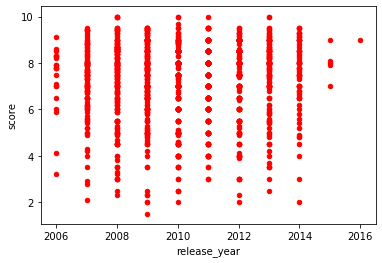

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

filtered_df.plot(kind='scatter', x='release_year', y='score',color='red')
plt.show()

## matplot - Alternativen und ihre Eignung

- [Plotly bzw. Plotly.express](https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af) - Interaktive, highlevel Charts mit sehr vielen Varianten (siehe kommende Demo).

- [Dash](https://towardsdatascience.com/python-for-finance-dash-by-plotly-ccf84045b8be) - Interaktive Charts für Dashboards, eigentlich mehr für Standalone-Anwendungen, aber mit [jupyterlab-dash](https://github.com/plotly/jupyterlab-dash) auch für Jupyter-Notebook geeignet.

- [Seaborn](https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0) - Highlevel Version von matplot zur Darstellung von statistisch orientierten Grafiken.

- [Bokeh](https://link.medium.com/GNjTZpjmz0) - Leistungsfähige Grafik- und Chart-Biblothek zur Verwendung in Jupyter. Für mehr Infos siehe Demos im [Tutorial](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb)

## Kleines Demo zu *Plotly.express*

In [17]:
import plotly.express as px
fig = px.scatter(filtered_df, x="release_year", y="score", template="plotly_dark")
#fig = px.box(filtered_df, x="release_year", y="score", template="plotly_dark")
fig.show()

## ipywidget - Interaktive Eingabe-Formulare

- Komponenten für die Interaktion mit dem Benutzer
- riesige Auswahl an [Komponenten](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)
  - Slider für Int und Float (auch Ranges)
  - Fortschrittsbalken
  - Dropdown und Radiobox
  - Texteingabe (auch mehrzeilig)
  - Combobox
  - Button
  - Date- und Colorpicker
  - und und und
- Events
- Event-Loop-Integration (asyncio)

## ipywidget - Demo

In [18]:
from IPython.display import display
import ipywidgets as widgets

int_slider = widgets.IntSlider()
int_slider.value = 6
display(int_slider)


IntSlider(value=6)

In [19]:
int_slider.value

6

## QGrid - Dynamische Tabellen ala Excel

In [13]:
import qgrid
df_grid = qgrid.show_grid(df)
df_grid # df_grid.get_changed_df() 

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Pivottablejs - Pivot für pandas-Dataframe

In [14]:
from pivottablejs import pivot_ui
pivot_ui(df)

## papermill - Automatisches Ausführen von Jupyter-Notebooks

Bei Papermill handelt es sich um einen Möglichkeit Jupyter-Notebooks automatisch auszuführen:

- Innerhalb von Software-Frameworks wie u.a. [Apache Airflow mit papermill-Integration](https://airflow.readthedocs.io/en/latest/howto/operator/papermill.html)
- [Beyond Interactive: Notebook Innovation at Netflix](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233) und [Part 2: Scheduling Notebooks at Netflix](https://medium.com/netflix-techblog/scheduling-notebooks-348e6c14cfd6) bei Netflix
- [CFM - *Pioneering scientific 
investment strategies.*](https://medium.com/capital-fund-management/automated-reports-with-jupyter-notebooks-using-jupytext-and-papermill-619e60c37330)
- und Andere

Wir haben eine Integration innerhalb der ProcessEngine.ts geplant (als External-Task-Worker)

### Demo mit *papermill*

In [15]:
import papermill as pm

payload = {'year': 2021}
input_filename = 'papermill_sample/papermill_freedays_input.ipynb'
output_filename = 'papermill_sample/papermill_freedays_output.ipynb'

pm.execute_notebook(
    input_filename,
    output_filename,
    parameters=payload
)

{'cells': [{'cell_type': 'code',
   'execution_count': 1,
   'metadata': {'ExecuteTime': {'end_time': '2019-11-20T13:47:47.691043Z',
     'start_time': '2019-11-20T13:47:47.684815Z'},
    'papermill': {'exception': False,
     'start_time': '2019-11-21T19:53:54.663630',
     'end_time': '2019-11-21T19:53:54.921427',
     'duration': 0.257797,
     'status': 'completed'},
    'tags': []},
   'outputs': [],
   'source': 'import json\nimport requests'},
  {'cell_type': 'code',
   'execution_count': 2,
   'metadata': {'ExecuteTime': {'end_time': '2019-11-20T13:47:47.705470Z',
     'start_time': '2019-11-20T13:47:47.700130Z'},
    'papermill': {'exception': False,
     'start_time': '2019-11-21T19:53:54.933075',
     'end_time': '2019-11-21T19:53:54.951955',
     'duration': 0.01888,
     'status': 'completed'},
    'tags': ['parameters']},
   'outputs': [],
   'source': 'year = 2021'},
  {'cell_type': 'code',
   'metadata': {'tags': ['injected-parameters'],
    'papermill': {'exception': F

## RISE - Slideshow mit Jupyter-Notebooks

- Präsentation direkt aus einem Jupyter-Notebook
- Es gibt unterschiedliche Zellentypen:
    - **slide**: Hauptseiten, der Präsentation
    - **subslide**: Unterseite für das entsprechende Thema
    - **fragment**: Blendet Elemente in den aktuellen Bildschirm ein
    - **skip**: Zelle wird übersprungen
    - **notes**: Möglichkeit *Speaker-Notes* zu erstellen
    
**Hint**: diese Präsentation basiert auf *RISE*

# Erweiterungen für Jupyter-Notebook

## ExecuteTime - Zeit zur Ausführung von Zellen bestimmen

- Stellt die Auführung von Code an der entsprechenden Zelle dar
- Laufzeitprobleme können damit rechtzeitig erkannt werden

![Beispiel für die Darstellung der Ausführungszeit](_assets/execute_time.png "Beispiel für die Darstellung der Ausführungszeit")

## Table of Content - Jupyter-Notebook organisiert

- Inhaltsverzeichnis aus den Header/Kapitel-Angaben der Markdown-Zellen

**Beispiel:**

<div>
<img src="_assets/Table-of-Content.png" width="350" align="center"/>
</div>

## nbconvert - Konvertieren von Notebooks in HTML, PDF etc.

- Konvertierung von Jupyter-Notebooks
- Unterstütze Formate
   - PDF
   - HTML

In [16]:
#!jupyter nbconvert --to slides JupyterNotebook-meets-5TeamWeekly.ipynb --post serve

- HTML-Ausgabe `http://127.0.0.1:8000/JupyterNotebook-meets-5TeamWeekly.slides.html#/`
- PDF-Ausgabe `http://127.0.0.1:8000/JupyterNotebook-meets-5TeamWeekly.slides.html?print-pdf`

## Zenmode

- ausblenden aller unötigen Informationen
- Fokus aus den Inhalt des Notebooks

**DEMO**

## Verwaltung von Erweiterungen

- [*jupyter_contrib_nbextensions*](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) ... als Sammlung, der wichtigsten Erweiterungen
- [*jupyter_nbextensions_configurator*](https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator) ... als Manager um die Erweiterungen via Weboberfläche zu verwalten und zu konfigurieren

# Ein paar nicht gezeigte Erweiterungen

- [ag-Grid](https://www.ag-grid.com/): *The Best JavaScript Grid in the World* [mit Juypter-Integration](https://medium.com/@olivier.borderies/harnessing-the-power-of-ag-grid-in-jupyter-3ae27fb21012)
- [voilà](https://blog.jupyter.org/and-voil%C3%A0-f6a2c08a4a93) *turns Jupyter notebooks into standalone web applications*
- [OAuth2 from inside a Jupyter Notebook](https://medium.com/@olivier.borderies/oauth2-from-inside-a-jupyter-notebook-5f5e61ec5d38) mit Google und Auth0


# Die Zukunft vom Projekt **Jupyter**

## Jupyterlab - der Nachfolger von Jupyter-Notebook

- flexible, integriert und erweiterbar 
- Dokumenten und Aktivitäten wie Jupyter-Notebooks, Texteditoren, Terminals und benutzerdefinierten Komponenten
- Reiterkarten, mehrere Dokumente und Aktivitäten nebeneinander

<div>
<img src="_assets/interface_jupyterlab.png" width="500" align="center"/>
</div>

siehe auch [Jupyter Lab: Evolution of the Jupyter Notebook](https://towardsdatascience.com/jupyter-lab-evolution-of-the-jupyter-notebook-5297cacde6b)

# Was gibt es sonst noch?

## JupyterHub - Opensource und Multiuserfähig

- Enterprise-Lösung auf OpenSource-Basis
- Multiuser-Umgebungen für Jupyter
- je Nutzer wird ein Container zugeordnet (Spawners)
- vielfach erweiterbar:
  - Autorisierung mittels Kerberos, SAML, OAuth, etc.
  - Datenspeicher für den Status der Notebook (SQL-Datenbanken, S3-Storage)
  - Verteilung der Container (k8s, YARN/Hadoop, fork, etc.)

### JupyterHub - Architektur

<hr />
<div>
<img src="_assets/jhub-parts.png" width="500" align="center"/>
</div>

## [Pangeo](https://pangeo.io/)

Eine, durch die Community geförderte, Wissenschaftsplattform für Datenanalysen basierend auf den vorher genannten Technologien.

z.B.:
- Klima
- Meteorologie
- Geowissenschaften

Beispiel: [Bewertung der Erhaltung des Wärme- und Salzgehalts in der Southern Ocean State Estimation](https://pangeo.io/use_cases/physical-oceanography/SOSE.html#gallery-use-cases-physical-oceanography-sose-ipynb)

## Google Colab - auch Google mischt mit.

- Jupyter in Google Drive
- direkt aus Google Drive zu starten
- Umgang mit [Resourcen von Google](https://colab.research.google.com/notebooks/io.ipynb) direkt aus den Notebooks, ohne weitere Anstrengung bei der Autorisierung


<hr />
<div>
<img src="_assets/Google-Colabratory.png" width="400" align="center"/>
</div>

*Nachteil*: Erweiterbarkeit ist eingeschränkt

## Microsoft Azure Notebooks - Was macht Microsoft?

- Kostenloses Hosting für Jupyter-Notebooks
- Beschränkung auf 4 GB Arbeitsspeicher und 1 GB Daten
    - Beschränkung kann durch ein Bezahl-Konto bei Azure aufgehoben werden
- Besonderheit: Es gibt ausser Python auch R und F#
- [Jede Menge Beispiele und Tutorials](https://docs.microsoft.com/de-de/azure/notebooks/azure-notebooks-overview)

## GitHub (Renderer) - Preview innerhalb von Github.

- seit 2015
- direktes *Rendern* von Jupyter-Notebook über die Webseite von GitHub
- Basis ist die Verwendung von [nbviewer](https://nbviewer.jupyter.org/)
    - nicht alle Erweiterungen werden unterstützt.
    - keine JS, CSS, Custom-HTML >> Sicherheitsrisiko
    - Indikator zeigt dann eine Umleitung auf den nbviewer an
- [Jeder Menge Beispiele](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

## Binder - Git-Repos direkt als Juypter-Notebook ausführen.

- Ausführen von Notebooks direkt aus einen Git-Repository
- Basiert auf Jupyter-Hub
- Siehe https://mybinder.org/
- Demo mit dieser Präsentation

## iOS - auch mobile kann man Jupyter-Notebooks verwenden

- **Juno Connect** (*kommerziell*)
  - Verbindung zu entfernten Notebook herstellen
  - Google Colab wird noch nicht unterstützt
- **Juno** (*kommerziell*)
  - Lokale Ausführung von Notebooks
  - keine Verbindung zu entfernten Notebooks unterstützt
- **Carnets** (*OpenSource*)
  - Lokale Ausführung von Notebooks
  - keine Verbindung zu entfernten Notebooks unterstützt

*Juno und Carnets unterstützen das auf iOS-Geräten vorhandene Dateisystem sowie dessen Remote-Dateisysteme.*

# Fazit

- Leistungsfähige interaktive Entwicklungsumgebung (nicht nur für Python)
- Verwendung innerhalb der ProcessEngine.ts (demnächst in dieser Show)
- Enterprise-Ready durch
  - JupyterHub
  - Binder
- sehr einfach zu verwenden
- großer Umfang an Erweiterungen (hier gab es nur die "Spitze des Eisbergs")
- Hervoragende Integration von
  - Code
  - Dokumentation

# Was nun? Starten!

**Wo ist die Präsentation ... öhm ... das Juypter-Notebook zu finden?**
- https://github.com/moellenbeck/jupyter_at_5minds
  - Läuft auf Grund der Erweiterungen nicht auf GitHub
  - kann direkt in Binder gestartet werden.
  
***Viel Spass ;-)***

*TODOs:*
- Docker?!? ... wir bekommen ein passendes Image
  - `docker run -p 8888:8888 5minds/juypter_at_5minds`
  - alle Bibliotheken und Voreinstellungen werden dabei installiert sein


# <font color='orange'>D</font><font color='#1B9AC'>anke euch.</font>
<hr />
<div>
<img src="_assets/danke2.jpeg" width="700" align="center"/>
</div>